In [1]:
import numpy as np
import pandas as pd
import pylab as py
import scipy.optimize as so
from scipy.fft import fft,ifft
import numpy.fft as fft
import scipy.signal as sg
import lib_optics as lib_o
import lib_m 
import sys
import os

c_m = 299792458.
pi = np.pi
radeg = (180./pi)
delta_freqGHz = 10 # GHz


n_in = 3.14
losstan_in = 1.e-4
d_m = 3e-3

index_guess = n_in
losstan_guess = losstan_in
# incident angle 
incidentangle_rad_i = 5./radeg  #   CHANGE THIS ANGLE TO REFLECT THE SETUP
incidentangle_rad_arr = np.array([incidentangle_rad_i])
incpol = 1

## Read file

In [2]:
dir_loc = '/home/julientang2001/Stage3A/'
dir_mid = 'Transmittances fits'
#filename = 'test13_0deg_1_1000Hz_Y_band_N_1001_20220713132902'
#filename = 'test13_0deg_3_1000Hz_Y_band_N_1001_20220713140000'
#filename = 'test13_90deg_1000Hz_Y_band_N_1001_20220713133512'
#filename = 'test13_180deg_1000Hz_Y_band_N_1001_20220713134050'
#filename = 'test13_270deg_1000Hz_Y_band_N_1001_20220713134556'
#filename = 'test13_360deg_1000Hz_Y_band_N_1001_20220713135123'
dir_out = dir_loc+'/Transmittances fits/'
dir_out_notched = dir_loc+'Notched Fits/'

In [3]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# define fit function
#    def func_HWPWG_alignment_model(freq_Hz, losstan_o_in, losstan_e_in, offset_in_rad):
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def read_txt3f_commma(filename):
    import fileinput
    arr1 = []
    arr2 = []
    arr3 = []
    filelines = fileinput.input(filename)
    i=0
    for line in filelines:
        print( i, line )
        ar = line.split(",")
        arr1.append(float(ar[0]))
        arr2.append(float(ar[1]))
        arr3.append(float(ar[2]))
        i+=1

    print( 'read from ' )
    print( '   ', filename )
    print( '    num= ', len(arr1) )
    return np.array(arr1), np.array(arr2), np.array(arr3)



In [4]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

dir_par = '/home/julientang2001/Stage3A/'
dir_data =  dir_par+'/Shaul202211_3dpripowderflatalumina/'

print(dir_data+'/WR22_SiPatterned0RA.csv')
filename = 'WR22_SapphireTA'

data = read_txt3f_commma(dir_data+'/WR22_SapphireTA.txt')
#data_WR34_TA_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTA.txt')

# data_WR22_TB_arr = read_txt3f_commma(dir_data+'/WR22_SapphireTB.txt')

print(dir_data+'/WR22_SiPatterned0RA.csv')
# filename = 'WR22_SapphireTB'

# data = read_txt3f_commma(dir_data+'/WR22_SapphireTB.txt')
# data_WR34_TB_arr = read_txt3f_commma(dir_data+'/WR34_SapphireTB.txt')

# print(dir_data+'/WR34_SiPatterned0RA.csv')
# filename = 'WR34_SapphireTB'

# data = read_txt3f_commma(dir_data+'/WR34_SapphireTB.txt')
#data_WR51_TB_arr = read_txt3f_commma(dir_data+'/WR51_SapphireTB.txt')
#fname = '/home/julientang2001/Stage3A/Shaul202211_3dpripowderflatalumina/WR51_SapphireTA.csv'
#arr = pd.read_csv(fname,encoding="cp932",skipfooter=2,header = 6)
#freq51 = arr['Freq(Hz)']
#trans51 = arr['S11 Lin Mag(U)']
#phase51 = arr['S11 Phase(ｰ)']
#data_WR51_TA_arr = np.zeros((3,np.size(freq51)))
#data_WR51_TA_arr[0]=freq51
#data_WR51_TA_arr[1]=trans51
#data_WR51_TA_arr[2]=phase51

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


/home/julientang2001/Stage3A//Shaul202211_3dpripowderflatalumina//WR22_SiPatterned0RA.csv
0 310000000000,0.57785571,90.235855

1 310250000000,0.97946894,83.557648

2 310500000000,0.17124602,97.21209

3 310750000000,2.7134428,106.81887

4 311000000000,0.83149338,97.533127

5 311250000000,0.92350525,92.777039

6 311500000000,0.67670524,95.365776

7 311750000000,0.74975252,98.051414

8 312000000000,0.80072588,95.061005

9 312250000000,0.76551962,100.88983

10 312500000000,0.88394541,90.49794

11 312750000000,0.96922678,80.507736

12 313000000000,1.057693,74.946823

13 313250000000,0.73431796,67.877594

14 313500000000,1.0765792,69.571281

15 313750000000,0.74186784,72.294342

16 314000000000,1.0253371,69.441483

17 314250000000,0.91403413,64.099289

18 314500000000,0.96003127,58.378597

19 314750000000,0.99065477,52.592636

20 315000000000,0.86579198,47.600327

21 315250000000,0.94853258,50.268433

22 315500000000,0.97621179,42.226177

23 315750000000,0.97087836,36.788502

24 316000000000

### Curve fit

In [5]:
def func_fitTransmittance(freq_Hz, index_in, losstan_in):
    # define the array
    d_m_arr = np.array([d_m])
    index_in_arr = np.array([1.,index_in, 1.])
    losstan_in_arr = np.array([0.,losstan_in,0.])
    tx = lib_o.fit_oblique_basic_multilayer_r_t_incloss( index_in_arr, losstan_in_arr, d_m_arr, freq_Hz, incidentangle_rad_arr, incpol)
    return np.abs(tx[2])**2
#++++++++++++++++++++++++++++++++++

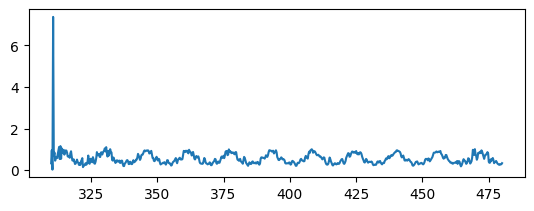

In [6]:
freqGHz_data = data[0]*1e-9
trans = data[1]**2
num_freq = len(freqGHz_data)
# han = np.hanning(num_freq)
# trans = trans1*han
sigma_in = np.ones(num_freq)*0.02
freqHz_arr = np.linspace(np.min(freqGHz_data)*1e9,np.max(freqGHz_data)*1e9,1000)

py.figure(2)

py.subplot(211)
py.plot(freqGHz_data, trans)


-------------------------------------------------------------------------------
WR22_SapphireTA_TransFit_v01.py
/home/julientang2001/Stage3A/Transmittances fits
 --  WR22_SapphireTA  -- 
initial input parameters: loss-o, loss-e, angle [deg] 3.14 0.0001
fit parameters, index:  3.179516770243461 +/- 0.0009173149786543219
fit parameters, losstan:  0.0004590112615578068 +/- 0.00017211505719691775
thickness: 3.0 [mm]
chisq = 198.3540163417772
-------------------------------------------------------------------------------

(681,)
(2, 341)
(681,)


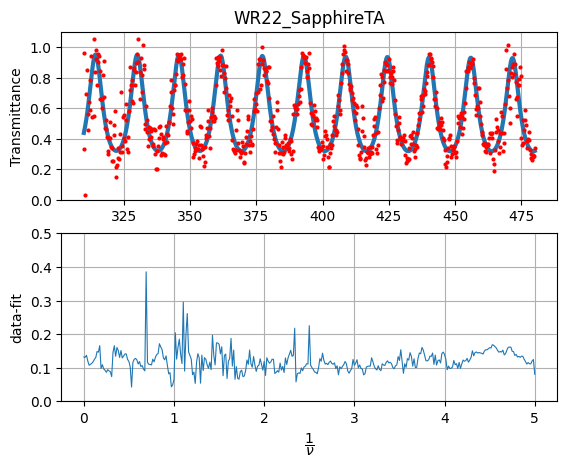

In [37]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

popt, pcov = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, trans, sigma=sigma_in, p0=np.array([index_guess, losstan_guess]), bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
perr = np.sqrt(np.diag(pcov))

print()
print('-------------------------------------------------------------------------------')
print('WR22_SapphireTA_TransFit_v01.py')
print(dir_loc+dir_mid)
print(' -- ',filename,' -- ')
print('initial input parameters: loss-o, loss-e, angle [deg]', index_guess, losstan_guess)
print('fit parameters, index: ', popt[0], '+/-', perr[0])
print('fit parameters, losstan: ', popt[1], '+/-', perr[1])
print('thickness:', d_m*1e3, '[mm]')


# num_pert =5
# n = popt[0]
# n_pert_arr = np.linspace(n*.95,n*1.05,num_pert)
# losstan = popt[1]
trans_fit = func_fitTransmittance(freqHz_arr, popt[0], popt[1]) 
trans_fit4res = func_fitTransmittance(freqGHz_data*1e9, popt[0], popt[1]) 
rechisq = 1./(num_freq-2.) * np.sum( (trans-trans_fit4res)**2/sigma_in**2 )
print('chisq =', rechisq)
print('-------------------------------------------------------------------------------')
print()
res = trans-trans_fit4res
res_fft = lib_m.calPSD(res,delta_freqGHz,6)
print(np.shape(trans_fit4res))
print(np.shape(res_fft))
print(np.shape(freqGHz_data)) 
# trans_fit_pert_arr = np.array([func_fitTransmittance(freqHz_arr, n_pert, losstan) for n_pert in n_pert_arr] )
# trans_fit4res_pert_arr = np.array([func_fitTransmittance(freqGHz_data*1e9, n_pert, losstan) for n_pert in n_pert_arr] )
# rechisq = np.array([1./(num_freq-2.) * np.sum( (trans-trans_fit4res[i])**2/sigma_in**2 ) for i in range (0,num_pert)])
# print('chisq =', rechisq)
# print('-------------------------------------------------------------------------------')
# print()
# res_fft_pert_arr = np.array([lib_m.calPSD(trans-trans_fit4res_pert_arr[i],delta_freqGHz,6) for i in range(0,num_pert)])
# print(np.shape(trans_fit4res_pert_arr))
# print(np.shape(res_fft_pert_arr))
# print(np.shape(freqGHz_data))
f_c = .9

py.figure(2)

py.subplot(211)
py.plot(freqHz_arr*1e-9, trans_fit, linewidth = 3)

# for i in range(0,num_pert):
#     py.plot(freqHz_arr*1e-9, trans_fit_pert_arr[i], linewidth = .5)
py.plot(freqGHz_data,trans,"r.",markeredgewidth=0.0001 )
py.ylim([0.,1.1])
py.grid()
py.ylabel('Transmittance')
py.title(filename)
        #  +' Perturbated')

py.subplot(212)
xx = res_fft[0]

# xx = res_fft_pert_arr[0][0]
py.plot(xx,res_fft[1], linewidth =.8)

# for i in range (0,num_pert):
#     #res_fft_sum = np.add(res_fft_sum,res_fft_pert_arr[i][1])/num_pert
#     py.plot(xx,res_fft_pert_arr[i][1], linewidth =.5)
#py.plot(freqGHz_data, trans - trans_fit4res)
py.ylim([0,0.5])
py.grid()
py.ylabel('data-fit')
py.xlabel('$\dfrac{1}{\\nu}$')
#py.text(np.min(freqGHz_data),-0.05, 'index, $\\tan{\\delta}$, $red. \\chi^2$, rms='+'{:1.2e}'.format(np.std(trans - trans_fit4res) ))
#py.text(np.min(freqGHz_data),-0.07, '{:1.2e}'.format(popt[0])+', '+ '{:1.3f}'.format(popt[1])+', '+ '{:1.3f}'.format(rechisq))
#py.text(np.min(freqGHz_data),-0.09, '{:1.2e}'.format(perr[0])+', '+ '{:1.3f}'.format(perr[1]))
# for i in range (1,int(6/f_c)):
#     py.axvline(i*f_c, color='r', linestyle = '--')

py.savefig(dir_out+'/PNG_fit_pert_index_losstan_'+filename+'.png')
py.show()

np.savez(dir_out+'/fitout_pert_arr_filename.npz',popt,perr,rechisq,data,sigma_in)

#sys.exit()


In [8]:
print(pcov.shape)

(2, 2)


In [9]:
def resul(opt,cov):
    ind0 = opt[0]
    tan0 = opt[1]
    dif = np.sqrt(np.diag(cov))
    return(np.array([ind0,tan0,dif[0],dif[1]]))

In [10]:
def RMS_res(data,fit):
    res= data-fit
    return(np.sqrt(np.mean(res**2)))

In [43]:
def ecretage(t,u,cutoff ,samplerate):
    n = len(t)
    cut = int(2*cutoff*(len(t)+1)/samplerate)
    if cut > n:
         cut =n
    sig = np.sqrt(np.var(t))
    m = np.mean(t)
    ecretage = np.zeros(n)
    lower_bound = m - u*sig
    upper_bound = m+u*sig
    for i in range(0,cut):
        if t[i] >= lower_bound and t[i] <= upper_bound:
                ecretage[i] =t[i]            
    return (ecretage)

In [29]:
power_fit = lib_m.calPSD(trans_fit4res,samplerate=delta_freqGHz,outputunit=6)

<function matplotlib.pyplot.show(close=None, block=None)>

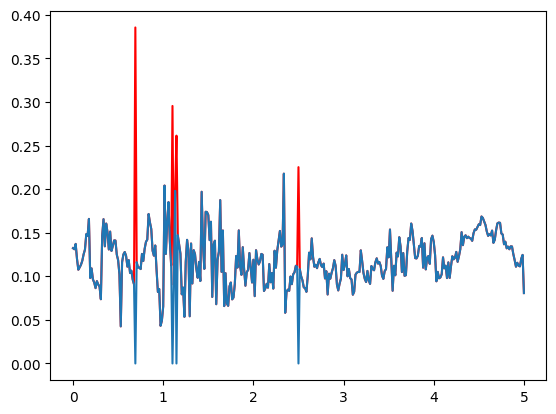

In [78]:
py.plot(xx,res_fft[1],'r')
py.plot(xx,ecretage(res_fft[1],3,cutoff=5,samplerate=delta_freqGHz))
# py.plot(power_fit[0],power_fit[1]*np.max(res_fft[1])/np.max(power_fit[1]),'k--', linewidth = 1)
py.show

In [79]:
resonances = res_fft[1]-ecretage(res_fft[1],u = 3, cutoff = 100,samplerate=delta_freqGHz)

In [80]:
filt_zeros = np.array([(resonance !=0) for resonance in resonances])
print(filt_zeros)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [81]:
freq_filt_zeros_arr =xx[np.where(filt_zeros)]
print(freq_filt_zeros_arr)

[0.69117647 1.10294118 1.14705882 2.5       ]


### Notch filter

(4, 2, 3)
(4, 2, 341)
(341,)


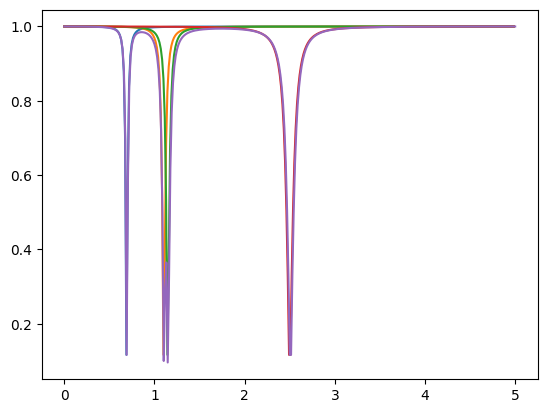

0.09598038038851198


In [101]:
def create_notch_filter(freq_arr, Q,fs):
    b, a = sg.iirnotch(freq_arr,Q,fs=fs)
    return b, a
filt_notch_ba = np.array([sg.iirnotch(freq,Q=20,fs=10) for freq in freq_filt_zeros_arr])
print(filt_notch_ba.shape)
filt_notch_resp = np.array([sg.freqz(b,a,worN=len(xx),fs=10) for (b,a) in filt_notch_ba])
print(filt_notch_resp.shape)
# for i in range(0,4):
#     py.plot(filt_notch_resp[i][0],np.abs(filt_notch_resp[i][1]))
# py.show()
filt_total = np.array([np.prod(filt_notch_resp[:,1,i]) for i in range(0,len(xx)) ])
print(filt_total.shape)
for i in range(0,4):
    py.plot(filt_notch_resp[i][0],np.abs(filt_notch_resp[i][1]))
py.plot(xx,np.abs(filt_total))
py.show()
print(np.min(np.abs(filt_total)))


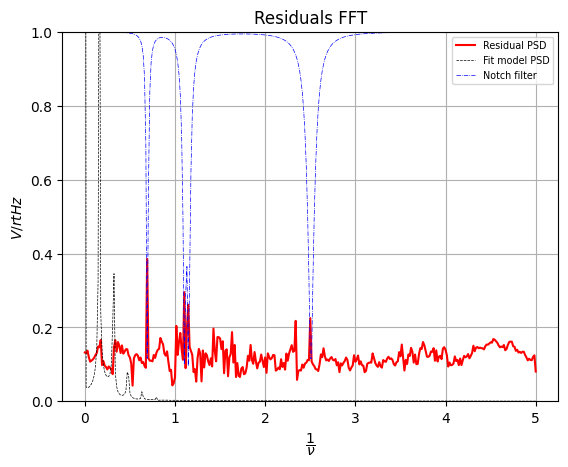

In [108]:
py.figure(1)
ax1 = py.subplot(111)
ax1.plot(xx,res_fft[1],'r', label = 'Residual PSD')
ax1.plot(xx,lib_m.calPSD(trans_fit4res,samplerate=delta_freqGHz,outputunit=6)[1],'k--',label = 'Fit model PSD',linewidth = .5)
ax1.plot(xx,np.abs(filt_total),'b-.',label = 'Notch filter',linewidth=0.5)
handles, labels = ax1.get_legend_handles_labels()
py.grid()
py.xlabel('$\dfrac{1}{\\nu}$')
py.ylabel('$V/rtHz$')
py.ylim(0,1)
# py.yscale('log')
py.legend(handles,labels, loc = 'best', fontsize = 'x-small')
py.title('Residuals FFT')
py.show()

# Filtering the transmittance data

In [116]:
trans_fft_ang = np.angle(np.fft.fft(trans))
trans_psd = lib_m.calPSD(trans,samplerate=delta_freqGHz,outputunit=6)
trans_psd_filt = np.abs(filt_total)**2*trans_psd[1]

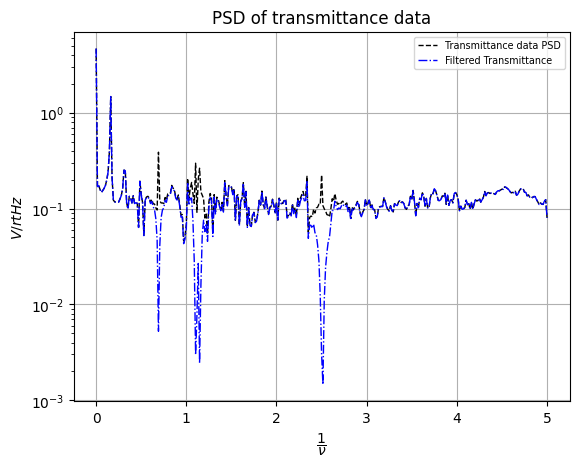

In [118]:
py.figure(1)
ax1 = py.subplot(111)
ax1.plot(xx,trans_psd[1],'k--',label = 'Transmittance data PSD',linewidth = 1)
ax1.plot(xx,trans_psd_filt,'b-.',label = 'Filtered Transmittance',linewidth=1)
handles, labels = ax1.get_legend_handles_labels()
py.grid()
py.xlabel('$\dfrac{1}{\\nu}$')
py.ylabel('$V/rtHz$')
# py.ylim(0,1)
py.yscale('log')
py.legend(handles,labels, loc = 'best', fontsize = 'x-small')
py.title('PSD of transmittance data')
py.show()

# from PSD back to data

In [13]:
# resonances = res_fft[1]-ecretage(res_fft[1],u=55,cutoff=2,samplerate=delta_freqGHz)
# py.plot(xx,resonances)
# py.show()
# # print(resonances)
# res_zeros = np.zeros(0)
# for i in range(0,len(res_fft[0])):
#     if resonances[i]!=0:
#         res_zeros = np.append(res_zeros,res_fft[0][i])
# print(res_zeros,res_zeros.shape)
# f1 = res_zeros[0]
# f2 = (res_zeros[3]+res_zeros[4])/2
# f3 = res_zeros[7]
# f4 = res_zeros[8]
# f4 = 2.45

# print(f1,f2,f3,f4)
# fs = 10
# Q = 35
# f_c = 2
# b1,a1 = sg.iirnotch(w0=f1,Q=Q,fs=fs)
# b2,a2 = sg.iirnotch(w0=f2,Q=Q,fs=fs)
# b3,a3 = sg.iirnotch(w0=f3,Q=Q,fs=fs)
# b4,a4 = sg.iirnotch(w0=f4,Q=Q,fs=fs)
# bl,al = sg.butter(N=2,Wn=f_c,btype='low',output='ba',fs=fs)
# freq1,h1 = sg.freqz(b=b1,a=a1,worN=len(xx),fs=fs)
# freq2,h2 = sg.freqz(b=b2,a=a2,worN=len(xx),fs=fs)
# freq3,h3 = sg.freqz(b=b3,a=a3,worN=len(xx),fs=fs)
# freq4,h4 = sg.freqz(b=b4,a=a4,worN=len(xx),fs=fs)
# filt = np.multiply(np.multiply(h1,h2),h4)
# filt= np.multiply(np.multiply(np.multiply(h1,h2),h3),h4)
# filt_exp = (2**filt)/2
# py.plot(freq1,h1,'r-')
# py.plot(freq2,h2,'b-')
# py.plot(freq1,filt,'k-.',linewidth = 1)
# py.plot(freq1,filt_exp,'r-',linewidth = 1)

# py.show()
# for i in range(110,len(res_fft_filt)):
#     res_fft_filt[i]=0

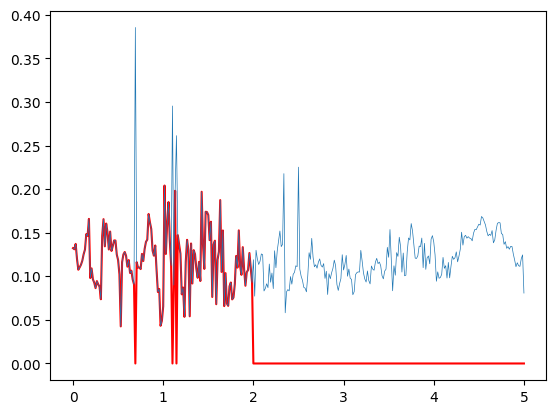

In [14]:
# res_fft_filt0 = res_fft[1]*filt_exp
res_fft_filt = ecretage(res_fft[1],55,cutoff=2,samplerate=delta_freqGHz)

py.plot(xx,res_fft_filt,'r')
py.plot(xx,res_fft[1],linewidth =0.5)
py.show()

### Filter

In [119]:
def inv_calPSD(PSD0, samplerate, outputunit):
    """ this program calculate the power spectrum density [V/rtHz]
        caution!  Normalization for k=1,...N/2-1 and k=0&nyquist is 
        is different by factor of sqrt(2)
        
        output unit
        1: sum squared amplitude K^2 (NRC 13.4.1)
        2: mean squared amplitude K^2/nbData (NRC 13.4.2)
        3: time integral squared amplitude K^2 sec (NRC 13.4.3)
        4: sqrt of 1
        5: sqrt of 2
        6: sqrt of 3
        7: normalized to 1 using the average of first 5 data points at low freq
        unit is still in K, not K^2
    """
    nrowh = len(PSD0)-1
    nbData = 2*nrowh+1
    delta = 1./samplerate
    N = np.double(nbData)
    Ck = np.zeros(nbData)
    if (outputunit == 1): 
        psd = PSD0/N
    if (outputunit == 2): 
        psd = PSD0
    if (outputunit == 3): 
        psd = PSD0/(delta*N)
        
    if (outputunit == 4):
        psd = PSD0**2/N
    if (outputunit == 5): 
        psd = PSD0**2
    if (outputunit == 6):
        psd = (PSD0**2)/(delta*N)
    
    psd = psd*np.double(N**2.)
#; inverse FT, direction=1, does not include normalization
#; same as (NRC-13.4.4)
    for i in range(1,nrowh): #i=1L, nrowh-1L do begin
        Ck[i] = np.sqrt(psd[i])/np.sqrt(2)
        Ck[nbData- i]= Ck[i]
    Ck[0] = np.sqrt(psd[0])
    Ck[nrowh] = np.sqrt(psd[nrowh])
    Ck[nrowh+1] = Ck[nrowh]


       
    # Ck = abs(fft.fft(datain))
        
    # freq = np.arange(0,nrowh+1)/np.double(nrowh)*samplerate/2.
    
   

    # # if (outputunit == 7): PSD = np.sqrt(PSD)/mean(np.sqrt(PSD[0:4]))
  
    return Ck


In [120]:
def recov_ifft(amp,phi):
    return (ifft(np.multiply(amp,np.exp(1j*phi))))

# From PSD back to data

In [122]:
trans_filt_amp = inv_calPSD(trans_psd_filt,samplerate = delta_freqGHz, outputunit = 6)

In [125]:
trans_filt = recov_ifft(trans_filt_amp,trans_fft_ang) 

In [127]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

popt, pcov = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, trans_filt, sigma=sigma_in, p0=np.array([index_guess, losstan_guess]), bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
perr = np.sqrt(np.diag(pcov))

print()
print('-------------------------------------------------------------------------------')
print('WR22_SapphireTA_TransFit_v01.py')
print(dir_loc+dir_mid)
print(' -- ',filename,' -- ')
print('initial input parameters: loss-o, loss-e, angle [deg]', index_guess, losstan_guess)
print('fit parameters, index: ', popt[0], '+/-', perr[0])
print('fit parameters, losstan: ', popt[1], '+/-', perr[1])
print('thickness:', d_m*1e3, '[mm]')


/home/julientang2001/anaconda3/envs/Mission1/lib/python3.10/site-packages/numpy/lib/function_base.py:625: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)



-------------------------------------------------------------------------------
WR22_SapphireTA_TransFit_v01.py
/home/julientang2001/Stage3A/Transmittances fits
 --  WR22_SapphireTA  -- 
initial input parameters: loss-o, loss-e, angle [deg] 3.14 0.0001
fit parameters, index:  3.1794757516726118 +/- 0.0008439358959909751
fit parameters, losstan:  0.0004599122756232511 +/- 0.00015834052829434653
thickness: 3.0 [mm]


/home/julientang2001/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


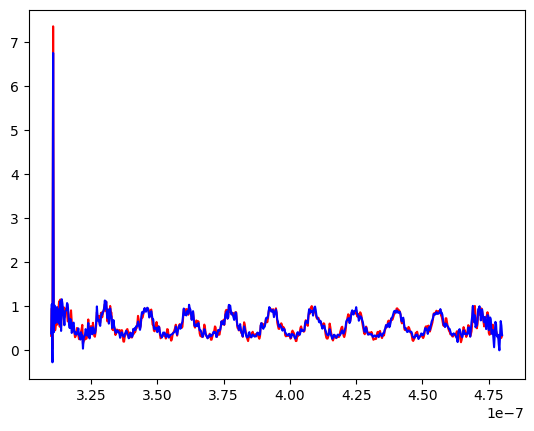

In [126]:
py.plot(freqGHz_data*1e-9, trans,'r')
py.plot(freqGHz_data*1e-9, trans_filt,'b')
py.show()

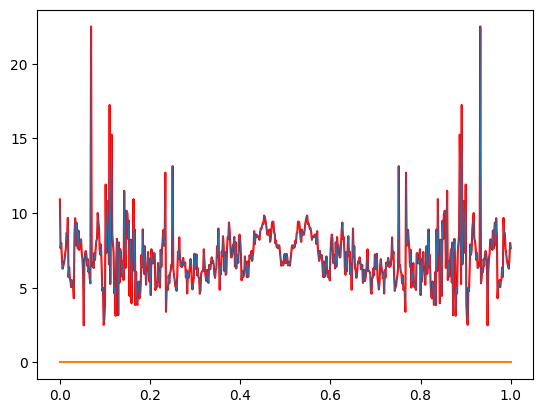

In [121]:
a = inv_calPSD(res_fft[1],delta_freqGHz,6)
x = np.linspace(0,1,len(res))
b = np.abs(fft.fft(res))
ang = np.angle(fft.fft(res))
phase = np.exp(1j*ang)
py.plot(x,a,'r')
py.plot(x,np.abs(fft.fft(res)),linewidth = 0.5)
py.plot(x,np.abs(fft.fft(res))-a)
py.show()
# print(a[341])
# print(b[341])
# print(res_fft[1][-1])

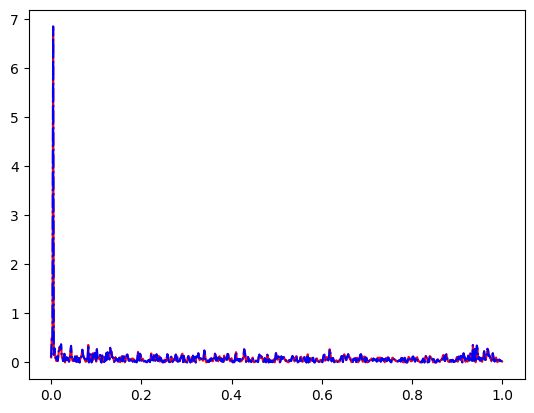

In [19]:
res_1 = fft.ifft(a*phase)
py.plot(x,np.abs(res),'r')
py.plot(x,np.abs(res_1),'b-.')
py.show()
# print(res_1[0])

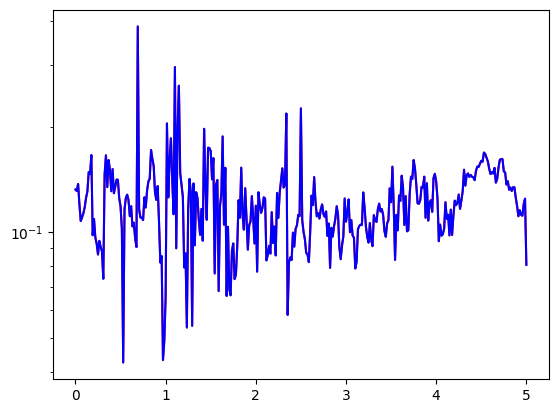

In [20]:
res_fft2 = lib_m.calPSD(res_1, delta_freqGHz,6)
py.plot(res_fft2[0],res_fft2[1],'r')
py.plot(xx,res_fft[1],'b')
py.yscale('log')
py.show()

(2, 341)


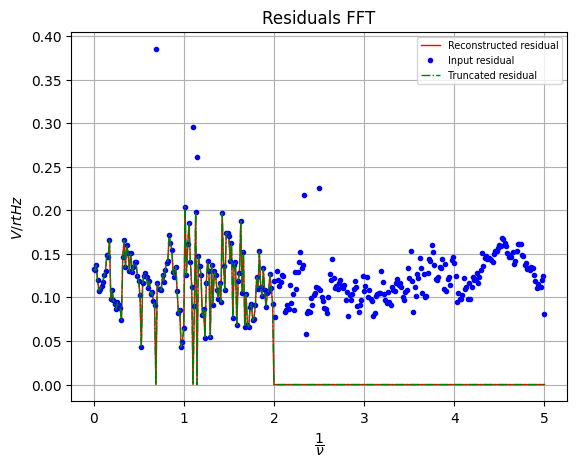

In [21]:

phi = np.angle(fft.fft(res))

amp = inv_calPSD(res_fft_filt,samplerate=delta_freqGHz,outputunit=6)
# print(np.fft.fftfreq(len(res)))
# res_filt = amp*phi
# print(res_filt.shape)
res_filt_sig = recov_ifft(amp,phi)
res_filt_fft2 = lib_m.calPSD(res_filt_sig,delta_freqGHz,6)
print(np.shape(res_filt_fft2))
py.figure(1)
ax1 = py.subplot(111)
ax1.plot(res_filt_fft2[0],res_filt_fft2[1],'r-', linewidth = 1,label = 'Reconstructed residual' )
ax1.plot(xx,res_fft[1],'b.', label ='Input residual',linewidth = 1)
ax1.plot(xx,res_fft_filt,'g-.',linewidth = 1,label = 'Truncated residual')
handles, labels = ax1.get_legend_handles_labels()
py.grid()
py.xlabel('$\dfrac{1}{\\nu}$')
py.ylabel('$V/rtHz$')
# py.yscale('log')
py.legend(handles,labels, loc = 'best', fontsize = 'x-small')
py.title('Residuals FFT')
py.show()

In [22]:
def oscillation(cutoff,u=55,psd=res_fft[1],samplerate=delta_freqGHz,angle=phi,uni=6):
    psd2 = ecretage(psd,u,cutoff,samplerate)
    Ck = inv_calPSD(PSD0=psd,samplerate=samplerate,outputunit=uni)
    Ck2 = inv_calPSD(PSD0=psd2,samplerate=samplerate,outputunit=uni)
    d = recov_ifft(Ck,angle)
    d2 = recov_ifft(Ck2,angle)
    return(d-d2)

In [23]:
osc = oscillation(cutoff=2)
print(osc.shape)


(681,)


/home/julientang2001/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


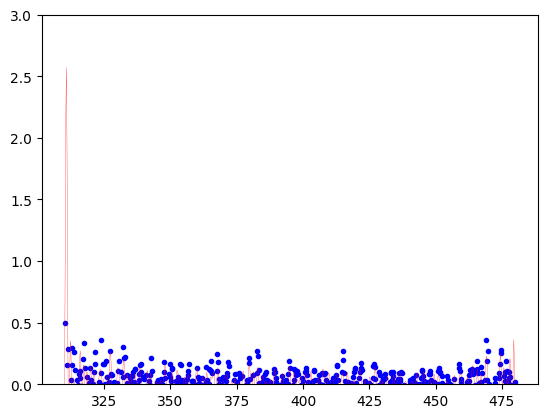

In [24]:
py.plot(freqGHz_data, res,'b.', linewidth = 1)
py.plot(freqGHz_data,  res_filt_sig,'r', linewidth = 0.2)
py.ylim(0,3)
py.show()

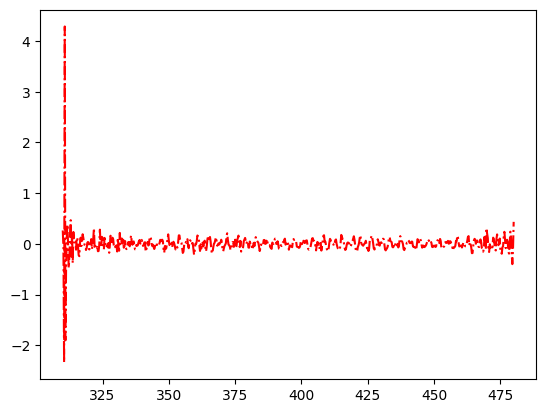

In [25]:
# oscillation = res-res_filt_sig
# py.plot(freqGHz_data,oscillation)
py.plot(freqGHz_data,osc,'r-.')
py.show()

In [26]:
# print(oscillation.shape)
print(trans.shape)

(681,)


In [27]:
def trans_notched(cut):
    return(trans-oscillation(cut))

In [32]:
u_arr = np.linspace(0.7,2.7,1000)


In [153]:
print(round(1.001,2))

1.0


In [154]:
num = 1.001
rounded_num = round(num, 2)
formatted_num = "{:.2f}".format(rounded_num)

print(formatted_num)

1.00


In [33]:
temp = np.zeros(len(trans))
Fit_filename = 'Data notched at $t_0=$'
opt_temp,cov_temp = popt,pcov
RMS0 = RMS_res(trans,trans_fit4res)
count = 0 
for u in u_arr:
    formatted_u = "{:.3f}".format(round(u,3))
    temp = trans_notched(u)
    opt_temp, cov_temp = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, temp, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
    fit4res = func_fitTransmittance(freqGHz_data*1e9,opt_temp[0],opt_temp[1])
    res_n = temp-fit4res
    # np.savez(dir_out_notched+'notched_data_at_t0_'+str(u)+'.npz',temp,fit4res)
    fig,[ax1,ax2] = py.subplots(2,1,sharex = True)
    trans_f = ax1.plot(freqGHz_data, fit4res,'k',label = 'fitted transmittance',
                        linewidth = 2)
    data_r = ax1.plot(freqGHz_data,trans,"b-.",label = 'Raw data', 
                      linewidth = 0.5)
    data_n = ax1.plot(freqGHz_data,temp,"r-.",label = 'Notched data',
                      linewidth = 0.5 )
    # ax1.legend([trans_f],['fitted transmittance'])
    # ax1.legend([data_r],['Raw data'])
    # ax1.legend([data_n],['Notched data'])
    ax1.set_ylim([0.,1.5])
    ax1.set_ylabel('Transmittance')
    ax1.grid(True)
    ax1.set_title(Fit_filename+formatted_u+'ns')
    res_raw=ax2.plot(freqGHz_data,res,"b-",label = 'Raw residual',
                     linewidth = 0.4)
    res_notched=ax2.plot(freqGHz_data,res_n,"r-.",label = 'Notched residual',
                         linewidth = 0.4)
    ax2.set_ylim([-0.5,0.5])
    ax2.text(freqGHz_data[len(freqGHz_data)//4], 0.3, "raw rms="+str(round(RMS0,3)) + '\n' +"notch rms=" + str(round(np.real(RMS_res(temp,fit4res)),3)))
    # ax2.legend([res_raw],['Raw residual'])
    # ax2.legend([res_notched],['Notched residual'])

    ax2.set_ylabel('Transmittance residual')
    ax2.grid(True)
    ax2.set_xlabel('$\\nu$')
    handles1, labels1 = ax1.get_legend_handles_labels()
    # handles2, labels2 = ax2.get_legend_handles_labels()
    py.legend(handles1,labels1, loc = 'best', fontsize = 'x-small')
    # py.legend(handles2,labels2, loc = 'best', fontsize = 'x-small')
    # py.title(Fit_filename+str(u)+'ns')
    py.savefig(dir_loc+'Fits between 0.7 and 2.7/'+'notched_plot_'+formatted_u+'.png')
    py.clf()
    count+=1
    print(count)



/home/julientang2001/anaconda3/envs/Mission1/lib/python3.10/site-packages/numpy/lib/function_base.py:625: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)
/home/julientang2001/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/tmp/ipykernel_19708/974960899.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,[ax1,ax2] = py.subplots(2,1,sharex = True)


21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
ret_datazfile0 = np.load(dir_out_notched+'notched_data_at_0.npz')
ret_datazfile0.files
data0 = ret_datazfile0['arr_0']
fit0 = ret_datazfile0['arr_1']

In [ ]:
ret_datazfile99 = np.load(dir_out_notched+'notched_data_at_99.npz')
ret_datazfile99.files
data99 = ret_datazfile99['arr_0']
fit99 = ret_datazfile99['arr_1']

In [ ]:
print(dir_out_notched)

/home/julientang2001/Stage3A/Notched Fits/


In [ ]:
ret_datazfile20 = np.load(dir_out_notched+'notched_data_at_20.npz')
ret_datazfile20.files
data50 = ret_datazfile20['arr_0']
fit50 = ret_datazfile20['arr_1']

/home/julientang2001/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


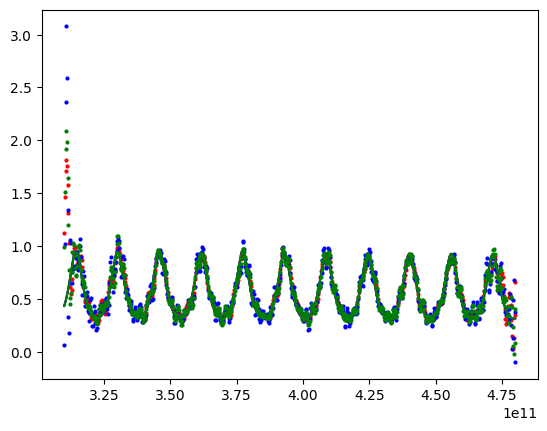

In [ ]:
py.plot(freqGHz_data*1e9,data0,'r.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit0,'r-')
py.plot(freqGHz_data*1e9,data99,'b.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit99,'b-')
py.plot(freqGHz_data*1e9,data50,'g.',markeredgewidth = 0.0001)
py.plot(freqGHz_data*1e9,fit50,'g-')
py.show()

In [34]:
def params(u):
    t_n = trans_notched(u)
    op, co = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, t_n, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
    n,d,dn,dd = resul(op,co)
    fit_n = func_fitTransmittance(freqHz_arr, op[0], op[1]) 
    fit4res_n = func_fitTransmittance(freqGHz_data*1e9, op[0], op[1]) 
    xsq_n = 1./(num_freq-2.) * np.sum( (t_n-fit4res_n)**2/sigma_in**2 )
    rms_n=RMS_res(t_n,fit4res_n)
    # Return index, losstan, error on index, error on losstan, chi^2, rms
    return(np.array([n,d,dn,dd,xsq_n,rms_n]))

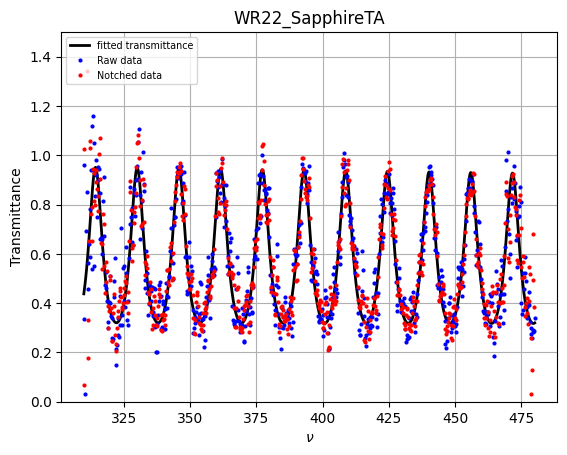

In [35]:
fig,ax = py.subplots()
t_n = trans_notched(2)
popt_n, pcov_n = so.curve_fit(func_fitTransmittance, freqGHz_data*1e9, t_n, sigma=sigma_in, p0=popt, bounds=([index_guess-1., 0.],[index_guess+1, 1e-2]) ) 
trans_fit_n = func_fitTransmittance(freqHz_arr, popt_n[0], popt_n[1]) 
ax.plot(freqHz_arr*1e-9, trans_fit_n,'k',label = 'fitted transmittance', linewidth = 2)
ax.plot(freqGHz_data,trans,"b.",label = 'Raw data', markeredgewidth=0.0001)
ax.plot(freqGHz_data,t_n,"r.",label = 'Notched data',markeredgewidth=0.0001 )
py.ylim([0.,1.5])
py.grid()
py.ylabel('Transmittance')
py.xlabel('$\\nu$')
py.title(filename)
        #  +' Perturbated')
handles, labels = ax.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
print(params(2))

[3.17950388e+00+0.00000000e+00j 4.58404781e-04+0.00000000e+00j
 5.60330407e-04+0.00000000e+00j 1.05137806e-04+0.00000000e+00j
 7.40285495e+01+1.98132572e-15j 1.71826818e-01+2.29941621e-18j]


In [36]:
resul_notched = np.array([params(u) for u in u_arr])
print(resul_notched.shape)

(1000, 6)


In [37]:
np.save('notched data from first systematic.npy',resul_notched)

In [ ]:
loaded_arr = np.load('notcheddata.npy')
print(loaded_arr)

[[3.17950989e+00+0.00000000e+00j 4.58959642e-04+0.00000000e+00j
  3.94001893e-04+0.00000000e+00j 7.39265179e-05+0.00000000e+00j
  3.65941005e+01+2.25899032e-15j 1.20808326e-01+3.72880921e-18j]
 [3.17951111e+00+0.00000000e+00j 4.58942511e-04+0.00000000e+00j
  3.94848261e-04+0.00000000e+00j 7.40853744e-05+0.00000000e+00j
  3.67517110e+01+1.46062652e-15j 1.21068206e-01+2.40581225e-18j]
 [3.17951111e+00+0.00000000e+00j 4.58942511e-04+0.00000000e+00j
  3.94848261e-04+0.00000000e+00j 7.40853744e-05+0.00000000e+00j
  3.67517110e+01+1.46062652e-15j 1.21068206e-01+2.40581225e-18j]
 [3.17951395e+00+0.00000000e+00j 4.58876764e-04+0.00000000e+00j
  4.03001209e-04+0.00000000e+00j 7.56153389e-05+0.00000000e+00j
  3.82860359e+01+1.97373598e-15j 1.23569568e-01+3.18515220e-18j]
 [3.17951560e+00+0.00000000e+00j 4.58836927e-04+0.00000000e+00j
  4.06047752e-04+0.00000000e+00j 7.61871028e-05+0.00000000e+00j
  3.88676570e+01+1.42164433e-15j 1.24504632e-01+2.27697419e-18j]
 [3.17951560e+00+0.00000000e+00j 4.

NameError: name 'res_n' is not defined

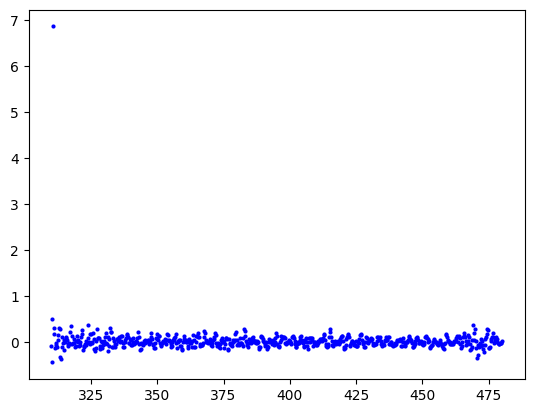

In [ ]:
fig2,ax2 = py.subplots()

ax2.plot(freqGHz_data,res,"b.",label = 'Raw data', markeredgewidth=0.0001)
ax2.plot(freqGHz_data,res_n,"r.",label = 'Notched data with hard cut off',markeredgewidth=0.0001 )
# py.yscale('log')
py.ylim(-1,1)
py.grid()
py.ylabel('PSD')
py.xlabel(r'$\nu$ (Ghz)')
py.title('Comparison of residuals PSD' )
handles, labels = ax2.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
rms = np.sqrt(np.mean(res**2))
rms_n = np.sqrt(np.mean(res_n**2))
print(rms,rms_n)

0.28126249579270235 (0.15976509387801083+2.4119683343763502e-18j)


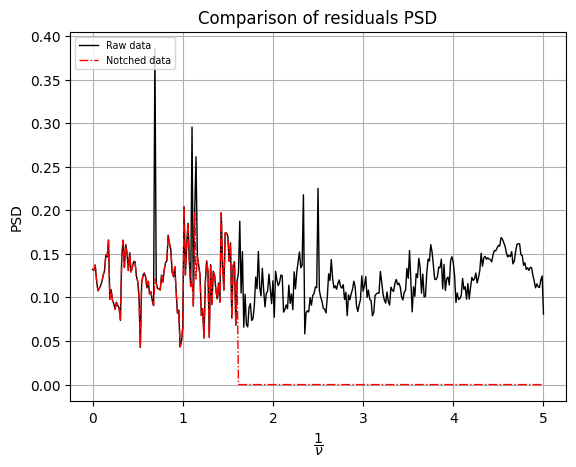

In [ ]:
fig3,ax3 = py.subplots()


ax3.plot(res_fft[0],res_fft[1],"k-",label = 'Raw data',linewidth=1 )
ax3.plot(res_n_fft[0],res_n_fft[1],"r-.",label = 'Notched data',linewidth=1 )
# py.yscale('log')
py.grid()
py.ylabel('PSD')
py.xlabel(r'$\dfrac{1}{\nu}$')
py.title('Comparison of residuals PSD' )
handles, labels = ax3.get_legend_handles_labels()


py.legend(handles,labels, loc = 'upper left', fontsize = 'x-small')
py.show()

In [ ]:
max1,i1 = maxi(res_fft[1],0,len(xx))
print(max1,i1)
max2,i2 = maxi(res_fft[1],i1+1,len(xx))
print(max2,i2)
max3,i3 = maxi(res_fft[1],i2+1,len(xx))
print(max3,i3)
max4,i4 = maxi(res_fft[1],i3+1,len(xx))
print(max4,i4)
max5,i5 = maxi(res_fft[1],i3+1,len(xx))
print(max4,i4)
print(res_fft[0][i1])
print(res_fft[0][i2])
print(res_fft[0][i3])
print(res_fft[0][i4])

0.3855153835742754 47
0.29545888813589 75
0.2614037505156574 78
0.22525479463447556 170
0.22525479463447556 170
0.6911764705882353
1.1029411764705883
1.1470588235294117
2.5


## Lowpass filtering

In [ ]:
trans_fit = func_fitTransmittance(freqHz_arr, popt[0], popt[1]) 
trans_fit_fft = fft(trans_fit)
#res_fit = lib_m.calPSD(trans_fit,delta_freqGHz,6)
#invfreq = res_fit[0]
#res_fit_fft = res_fit[1]
b,a = sg.butter(1,f_c,'low',output='ba',fs=fs)
low_pass_sos = sg.butter(1,f_c,'low',output='sos',fs=fs)
w,h = sg.freqs(b,a,worN = np.size(trans_fit))
trans_fit_fft_filt = sg.sosfilt(low_pass_sos,trans_fit_fft)
#res_fit_fft_filt = sg.sosfilt(low_pass,res_fit_fft)
trans_fit_filt = ifft(trans_fit_fft_filt)
trans_fit_abs = np.abs(trans_fit)
trans_fit_phase = np.angle(trans_fit)
trans_fit_filt_abs = np.abs(trans_fit_filt)
trans_fit_filt_phase = np.angle(trans_fit_filt)


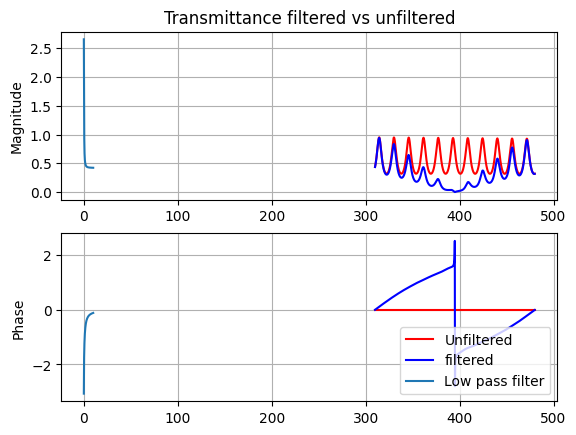

In [ ]:
py.figure(2)

ax1=py.subplot(211)


py.plot(freqHz_arr*1e-9,trans_fit_abs,'r')
py.plot(freqHz_arr*1e-9,trans_fit_filt_abs,'b')
py.plot(w,np.abs(h))
#py.plot(invfreq,res_fit_fft,'r')
#py.plot(invfreq,res_fit_fft_filt,'b')
py.grid()
py.ylabel('Magnitude')
py.title('Transmittance filtered vs unfiltered')
py.show
ax2 = py.subplot(212,sharex = ax1)

ax2.plot(freqHz_arr*1e-9,trans_fit_phase,'r',label='Unfiltered')
ax2.plot(freqHz_arr*1e-9,trans_fit_filt_phase,'b',label = 'filtered')
ax2.plot(w,np.angle(h),label = 'Low pass filter')

handles, labels = ax2.get_legend_handles_labels()

#py.plot(invfreq,res_fit_fft,'r')
#py.plot(invfreq,res_fit_fft_filt,'b')
py.grid()
py.ylabel('Phase')
py.legend(handles,labels, loc = 'lower right')

py.show()


#sys.exit()

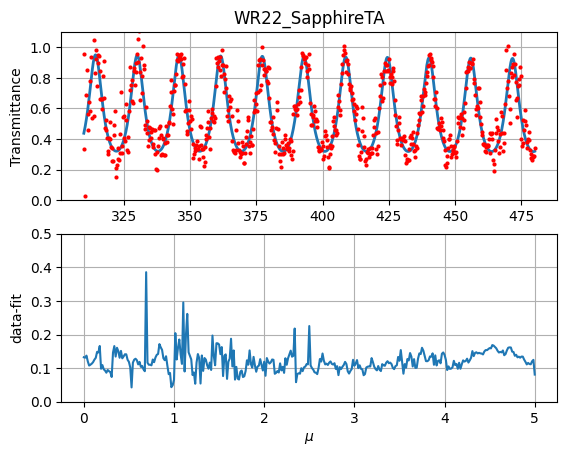

In [ ]:

py.figure(2)

py.subplot(211)
py.plot(freqHz_arr*1e-9, trans_fit, linewidth = 2)
py.plot(freqGHz_data,trans,"r.",markeredgewidth=0.0001 )
py.ylim([0.,1.1])
py.grid()
py.ylabel('Transmittance')
py.title(filename)

py.subplot(212)

py.plot(res_fft[0],res_fft[1])
#py.plot(freqGHz_data, trans - trans_fit4res)
py.ylim([0,0.5])
py.grid()
py.ylabel('data-fit')
py.xlabel('$\mu$')
#py.text(np.min(freqGHz_data),-0.05, 'index, $\\tan{\\delta}$, $red. \\chi^2$, rms='+'{:1.2e}'.format(np.std(trans - trans_fit4res) ))
#py.text(np.min(freqGHz_data),-0.07, '{:1.2e}'.format(popt[0])+', '+ '{:1.3f}'.format(popt[1])+', '+ '{:1.3f}'.format(rechisq))
#py.text(np.min(freqGHz_data),-0.09, '{:1.2e}'.format(perr[0])+', '+ '{:1.3f}'.format(perr[1]))

py.savefig(dir_out+'/PNG_fit_pert_index_losstan_'+filename+'.png')
py.show()

np.savez(dir_out+'/fitout_pert_arr_filename.npz',popt,perr,rechisq,data,sigma_in)

#sys.exit()


In [ ]:
for i in range(0,num_pert):
    py.plot(freqGHz_data, trans - trans_fit4res_pert_arr[i])
py.ylim([0,1.5])
py.grid()
py.ylabel('data-fit')
py.xlabel('$\mu$')

NameError: name 'num_pert' is not defined

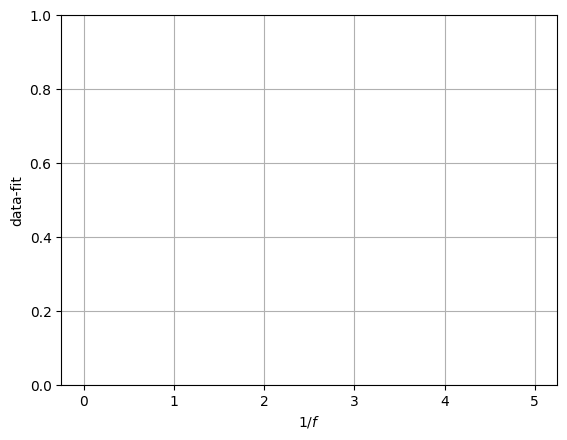

In [ ]:
xx = res_fft_pert_arr[0][0]
#res_fft_sum = np.zeros(np.size(res_fft_pert_arr[0][1]))
for i in range (0,num_pert):
    #res_fft_sum = np.add(res_fft_sum,res_fft_pert_arr[i][1])/num_pert
    py.plot(xx,res_fft_pert_arr[i][1])
py.ylim([0,1])
py.grid()
py.ylabel('data-fit')
py.xlabel('$1/f$')


py.savefig(dir_out+'/PNG_fit_pert_index_losstan_'+filename+'.png')
py.show()